1190451 - Hadeel Abdellatif

**Note: Please be sure that the "cars.csv" file should be in "content" folder.**

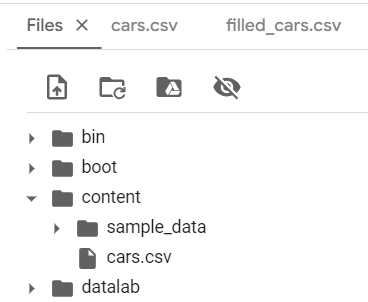



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew, kurtosis, shapiro


Part 1 : Read the dataset and examine how many features and examples does it have


In [ ]:
CarsDataFrame = pd.read_csv('cars.csv')
num_features = CarsDataFrame.shape[1]
num_examples = CarsDataFrame.shape[0]

print("Part 1: Read the dataset and examine how many features and examples does it have")
print("Number of Features : ",num_features)
print("Number of Examples : ",num_examples)



Part 1: Read the dataset and examine how many features and examples does it have
Number of Features :  8
Number of Examples :  398


- In this part number of features was 8 (mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, and, origin), and number of Examples.

Part 2: Are there features with missing values? How many missing values are there in each one?

In [ ]:
missing_values = CarsDataFrame.isnull().sum()
print("Missing Values : ")
print(missing_values)

Missing Values : 
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          2
dtype: int64


- As we can note that there are 6 missing values in horsepower and 2 in origin.

Part 3: Fill the missing values in each feature using a proper imputation method (for example: fill with mean, median, or mode)

In [ ]:
# I used the mean to fill in the missing values for numerical characteristics "horsepower".
for column in CarsDataFrame.select_dtypes(include=['float64', 'int64']).columns:
    CarsDataFrame[column].fillna(CarsDataFrame[column].mean(), inplace=True)

# I used the mode to fill in the missing values for category characteristics "origin".
for column in CarsDataFrame.select_dtypes(include=['object']).columns:
    CarsDataFrame[column].fillna(CarsDataFrame[column].mode()[0], inplace=True)

# Then I save the data in new csv file called "filled_cars.csv"
CarsDataFrame.to_csv('filled_cars.csv', index=False)
missing_values = CarsDataFrame.isnull().sum()

# To be sure that the missing values are filled successfully
print("Missing Values : ")
print(missing_values)


Missing Values : 
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


-	After fill the missing values we can note that all the values are filled successfully.

-	For example, the missing values in horsepower were filled using mean:

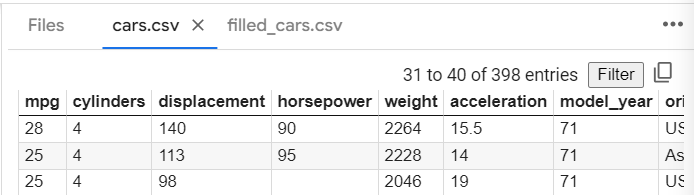
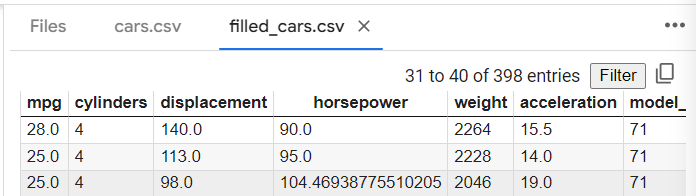
-	And the missing values in origin were filled using mode.
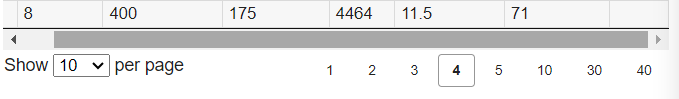

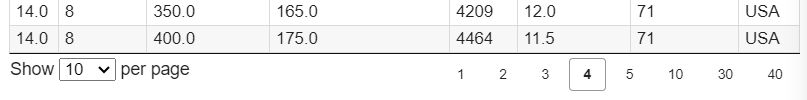

Part 4: Which country produces cars with better fuel economy?

<Figure size 1000x600 with 0 Axes>

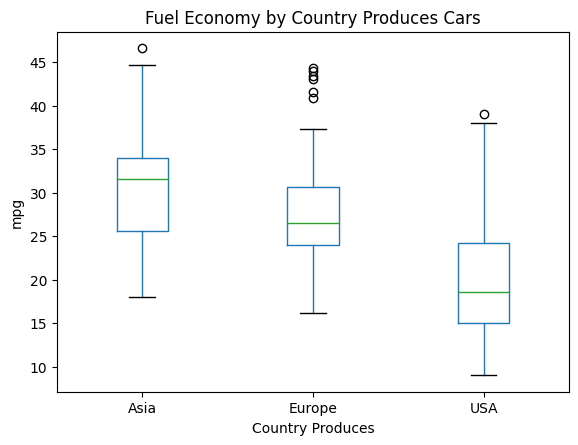

In [ ]:
# Get the data and save them in "CarsFilledDataFrame"
CarsFilledDataFrame = pd.read_csv('filled_cars.csv')

# Before converting to 'category'
# print(CarsFilledDataFrame['origin'].memory_usage(deep=True))

# converting the 'origin' column in the CarsFilledDataFrame to a categorical data type
CarsFilledDataFrame['origin'] = CarsFilledDataFrame['origin'].astype('category')

# After converting to 'category'
# print(CarsFilledDataFrame['origin'].memory_usage(deep=True))

# plot
plt.figure(figsize=(10, 6))
boxplot = CarsFilledDataFrame.boxplot(column=['mpg'], by='origin', grid=False)
plt.title('Fuel Economy by Country Produces Cars')
plt.suptitle('')
plt.xlabel('Country Produces')
plt.ylabel('mpg')
plt.show()


-	According to the fegure below, Asian cars have a better fuel economy compared to European and American cars. This is due to the highest median value, indicating a higher central tendency for fuel efficiency. Asian cars also have a tighter interquartile range and fewer outliers, indicating less variability and more consistency in their fuel economy. These factors, combined with a higher median mpg, suggest that Asian cars are generally more fuel-efficient.

Part 5: Which of the following features has a distribution that is most similar to a Gaussian: ‘acceleration’, ‘horsepower’, or ‘mpg’? Answer this part by showing the histogram of each feature.

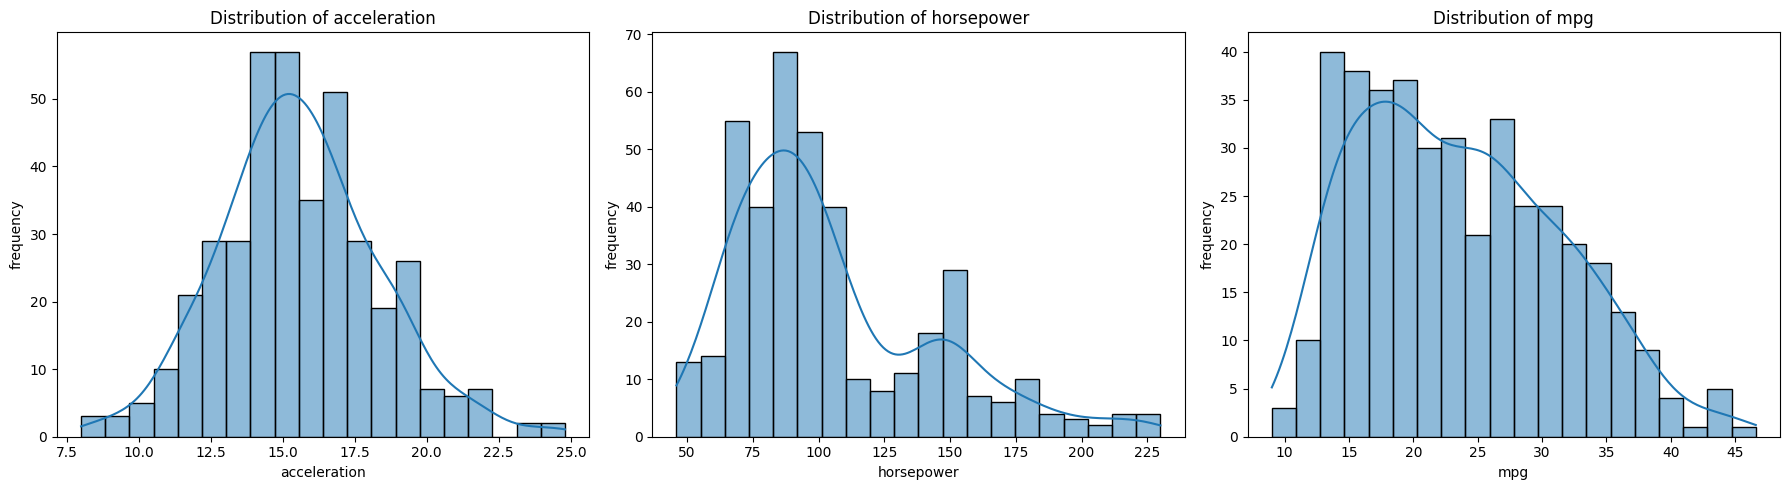

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# List of features from csv file
features = ['acceleration', 'horsepower', 'mpg']

# To plot the histogram for features
for i, feature in enumerate(features):

    # Plot histogram
    sns.histplot(CarsFilledDataFrame[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('frequency')

plt.tight_layout()
plt.show()

-	The histogram plot shows that the 'acceleration' data is the most symmetrical, resembling a Gaussian distribution's bell shape. the 'horsepower' data has distinct peaks not typical of a normal distribution, while the 'mpg' data shows a slight skew away from a pure Gaussian form. The analysis suggests that the acceleration data distribution closely mimics a Gaussian distribution, indicating a higher degree of normalcy in its spread.

Part 6: Support your answer for part 5 by using a quantitative measure

In [ ]:
features = ['mpg', 'horsepower', 'acceleration']

for feature in features:
    # Calculate skewness and kurtosis
    skewness = skew(CarsFilledDataFrame[feature])
    kurt = kurtosis(CarsFilledDataFrame[feature])

    # Print results
    print(f"{feature}: Skewness = {skewness}, Kurtosis = {kurt}")

mpg: Skewness = 0.45534192556309266, Kurtosis = -0.5194245405990441
horsepower: Skewness = 1.0914191838332945, Kurtosis = 0.7290385466123319
acceleration: Skewness = 0.27772507624356363, Kurtosis = 0.3992077323931644


- If the skewness is close to 0 and the kurtosis is close to 3, the distribution is more Gaussian in shape. Of the three features, “Acceleration” appears to be relatively closer to a Gaussian distribution, as it has a skewness close to 0 and a kurtosis closer to 3. The other two features, “Horsepower” and “MPG,” show positive skewness, indicating asymmetry , and kurtosis values are less than 3, indicating lighter tails compared to the Gaussian distribution.

Part 7: Plot a scatter plot that shows the ‘horsepower’ on the x-axis and ‘mpg’ on the
y-axis. Is there a correlation between them? Positive or negative?

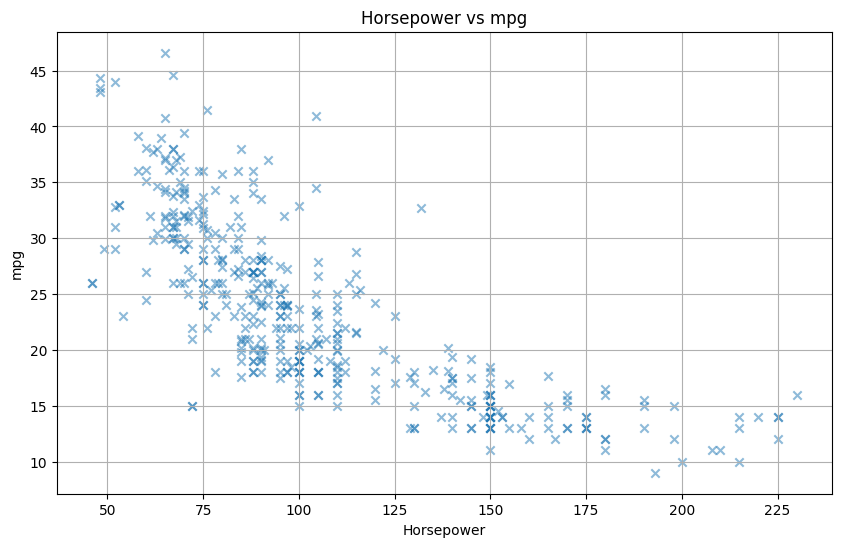

The correlation coefficient between horsepower and mpg is: -0.77
There is a negative correlation between horsepower and mpg.


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(CarsDataFrame['horsepower'], CarsDataFrame['mpg'],marker='x', alpha=0.5)
plt.title('Horsepower vs mpg')
plt.xlabel('Horsepower')
plt.ylabel('mpg')
plt.grid(True)
plt.show()

# Calculate the correlation coefficient
correlation_coefficient = CarsDataFrame['horsepower'].corr(CarsDataFrame['mpg'])
print(f"The correlation coefficient between horsepower and mpg is: {correlation_coefficient:.2f}")

# Find correlation type
if correlation_coefficient > 0:
    correlation_type = 'positive'
elif correlation_coefficient < 0:
      correlation_type = 'negative'
else:
    correlation_type = 'no'

print(f"There is a {correlation_type} correlation between horsepower and mpg.")

-    According to the results, the correlation coefficient between “horsepower” and “miles per gallon” is -0.77, which indicates a high negative correlation. This indicates that a vehicle's fuel economy typically decreases as horsepower increases. This means that vehicles with larger engines (with more horsepower) generally use more gasoline, lowering their mpg ratings.

Part 8: Implement the closed form solution of linear regression and use it to learn a
linear model to predict the ‘mpg’ from the ‘horsepower’. Plot the learned line
on the same scatter plot you got in part 7.
(Hint: This is a simple linear regression problem (one feature). Do not forget to add
x0=1 for the intercept. For inverting a matrix use np.linalg.inv from NumPy)


theta:  [40.00451552 -0.15784473]


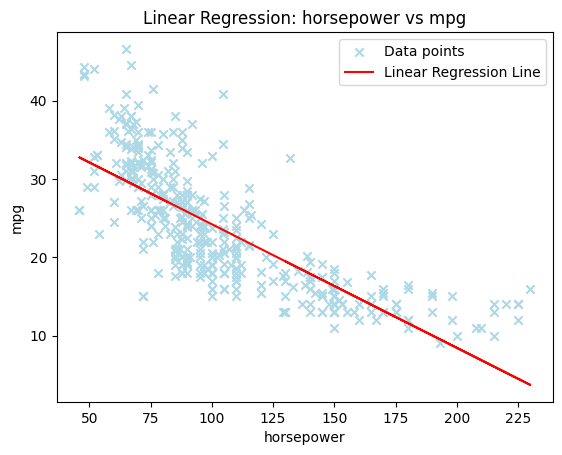

In [ ]:
# Get the target variable y and feature matrix X.
X = np.c_[np.ones(CarsFilledDataFrame['horsepower'].shape[0]), CarsFilledDataFrame['horsepower'].values]
y = CarsFilledDataFrame['mpg'].values

# Use the linear regression closed-form solution to get the ideal parameters (theta).
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("theta: ",theta)

# Plot of the data points "scatter" and the linear regression line "plot".
plt.scatter(CarsFilledDataFrame['horsepower'], y, color='lightblue', marker='x', label='Data points')
plt.plot(CarsFilledDataFrame['horsepower'], X.dot(theta), color='red', label='Linear Regression Line')

plt.title('Linear Regression: horsepower vs mpg')
plt.xlabel('horsepower')
plt.ylabel('mpg')

plt.legend()
plt.show()

- The red line represents the linear regression line fitted to the data using the closed-form solution.

- The relationship between "horsepower" and "miles per gallon" is clearly inverse, as the graphic shows. The model suggests that as "horsepower" increases, "miles per gallon" will decrease and vice versa, reflecting expectations that more powerful engines tend to be less fuel efficient.

- According to the value of theta, mpg= theta0 + theta 1 x horsepower so mpg = 40.00451552 + -0.15784473 horsepower. This equation can be used to make predictions for 'mpg' based on new or existing values of 'horsepower'.

Part 9: Repeat part 8 but now learn a quadratic function of the form
f = w0 + w1x + w2x
2

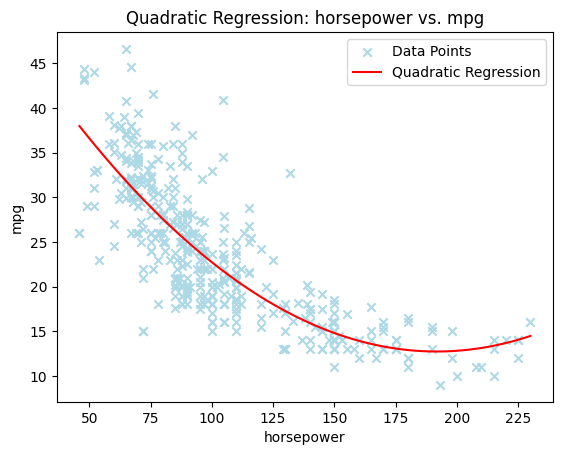

In [ ]:
# Obtain the target variable y and the feature matrix X_quad.
X_quad = np.column_stack((np.ones_like(CarsFilledDataFrame['horsepower']), CarsFilledDataFrame['horsepower'], CarsFilledDataFrame['horsepower'] ** 2))
w_quad = np.dot(np.dot(np.linalg.inv(np.dot(X_quad.T, X_quad)), X_quad.T), y)

# Plot the data points
plt.scatter(CarsFilledDataFrame['horsepower'], CarsFilledDataFrame['mpg'], marker='x', color='lightblue', label='Data Points')

# Generate a range of x values for plotting the quadratic regression line
x_range = np.linspace(CarsFilledDataFrame['horsepower'].min(), CarsFilledDataFrame['horsepower'].max(), 100)
X_quad_plot = np.column_stack((np.ones_like(x_range), x_range, x_range ** 2))

# Use the quadratic regression parameters to predict y values.
y_quad_plot = np.dot(X_quad_plot, w_quad)

# Plot the quadratic regression line
plt.plot(x_range, y_quad_plot, color='red', label='Quadratic Regression')
plt.title('Quadratic Regression: horsepower vs. mpg')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

- According to the figure above, The nonlinear and inverse relationship of the quadratic regression model for horsepower versus mpg indicates that changes in horsepower have varying and accelerating effects on mpg, providing a more realistic representation of the underlying dynamics. So the relationship between engine power and fuel efficiency is best described as a curvilinear function rather than a straight line which means that Quadratic Regression is better than Linear Regression.

Part 10: Repeat part 8 (simple linear regression case) but now by implementing the
gradient descent algorithm instead of the closed form solution.

Final learned parameters:
theta_0: 40.00451543591546
theta_1: -0.15784473265915022


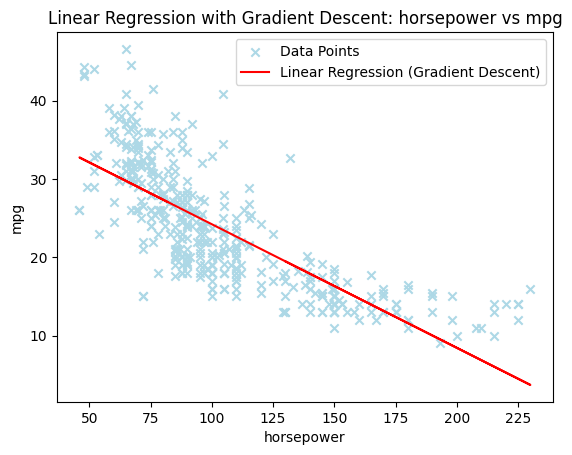

In [ ]:
X = CarsFilledDataFrame['horsepower'].values
y = CarsFilledDataFrame['mpg'].values

# Adding the intercept term
X_normalized = np.column_stack((np.ones_like(X), X))

# Select the learning rate and number of iterations
learning_rate = 0.0001
num_iterations = 1700000

# Initialize parameters: y-intercept, slope, and number of observations
theta_0 = 0
theta_1 = 0
n = len(X)

# For each itaration
for i in range(num_iterations):
    # Calculate predicted values
    y_pred = theta_0 + theta_1 * X_normalized[:, 1]

    # Calculate gradients
    gradient_theta_1 = (1 / n) * np.sum((y_pred - y) * X_normalized[:, 1])
    gradient_theta_0 = (1 / n) * np.sum(y_pred - y)

    # Update parameters
    theta_0 -= learning_rate * gradient_theta_0
    theta_1 -= learning_rate * gradient_theta_1

    # Print parameters at each iteration
    # if i % 10000 == 0:  # Print every 10000 iterations (adjust as needed)
    #     print(f'Iteration {i}: theta_0 = {theta_0}, theta_1 = {theta_1}')

print("Final learned parameters:")
print("theta_0:", theta_0)
print("theta_1:", theta_1)

# Plotting the learned line with gradient descent
plt.scatter(X, y, marker='x', color='lightblue', label='Data Points')
plt.plot(X, theta_0 + theta_1 * X_normalized[:, 1], color='red', label='Linear Regression (Gradient Descent)')
plt.title('Linear Regression with Gradient Descent: horsepower vs mpg')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.legend()
plt.show()

- I used 1700000 iterations with a learning rate of 0.0001 to get theta_0: 40.00451543591546 and theta_1: -0.15784473265915022 as part 8 theta: [40.00451552 -0.15784473], and the plot is very similar to the plot in Part 8.